In [10]:
#importing libraries

import random as rd
import matplotlib.pyplot as plt
from timeit import default_timer as timer
import rsa

In [11]:
#declaring of varibles
numberOfExperts = 0
numberOfCandidates = 0


#Collection of rsa public and private keys for digital signature
dictOfrsaPubKey = {}
dictOfrsaPriKey = {}
marksToCandidates = []


In [12]:
def initVariables(E,C):
    global numberOfExperts, numberOfCandidates
    numberOfExperts, numberOfCandidates = E, C


In [13]:
#code to generate rsa public and private keys
def generateRSAKeys():
    global dictOfrsaPubKey, dicOfrsaPriKey
    for i in range(numberOfExperts):
        (pubkey, privkey) = rsa.newkeys(512)
        dictOfrsaPubKey[i],dictOfrsaPriKey[i] = pubkey, privkey 


In [14]:
# function to create digital signature
def createDigitalSignature(message,i):
    privkey = dictOfrsaPriKey[i]
    temp = str(message).encode()
    signature = rsa.sign(temp, privkey, 'SHA-1')
    return signature

In [15]:
#this part of the code finds the highest marks gaining candidate id this acts as the candidate manager for the first frame work
def candidateManagerFrameWork1BestCandidate():
    array  = []
    for i in range(len(marksToCandidates[0])):
        sum = 0
        for j in range(len(marksToCandidates)):
            sum = sum + marksToCandidates[j][i][0]
        # print(sum)
        array.append(sum)
        
    print("highest marks gaining candidate =",array.index( max(array)))    


In [16]:
#this part of the code defines the first frame work
def expertFunctionToGiveMarks():
    global marksToCandidates
    marksToCandidates = [[0 for i in range(numberOfCandidates)] for j in range(numberOfExperts)]
    for i in range(numberOfExperts):
        for j in range(numberOfCandidates):
            mark = rd.randint(0,10)
            marksToCandidates[i][j] = [mark,createDigitalSignature(mark,i)]


In [17]:
def plotGraph(a,b):
    plt.plot(a,b,marker = "*")
    plt.xlabel("numberOfExperts")
    plt.ylabel("timeConsumed")
    plt.show()

highest marks gaining candidate = 0


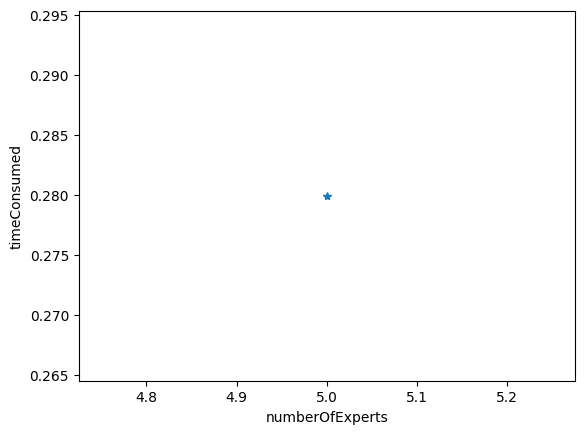

highest marks gaining candidate = 7


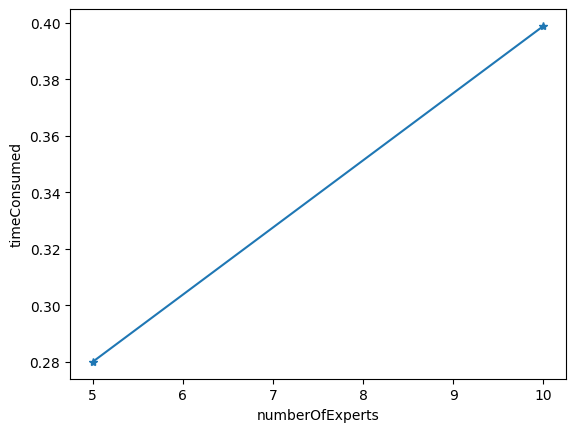

highest marks gaining candidate = 42


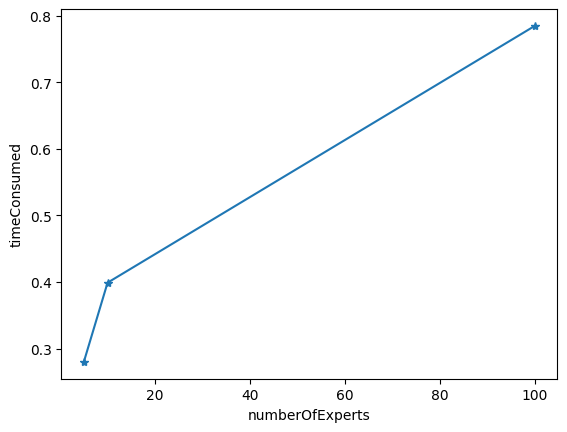

highest marks gaining candidate = 17


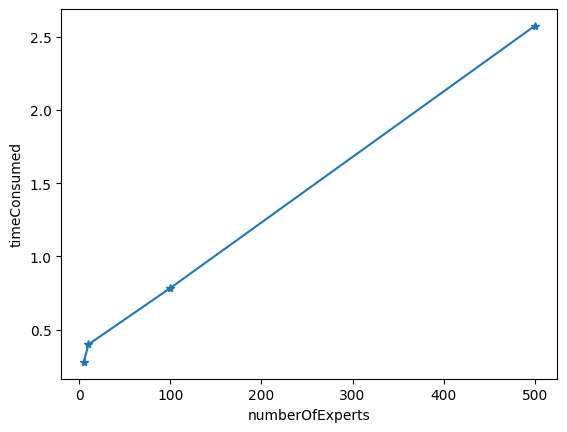

highest marks gaining candidate = 266


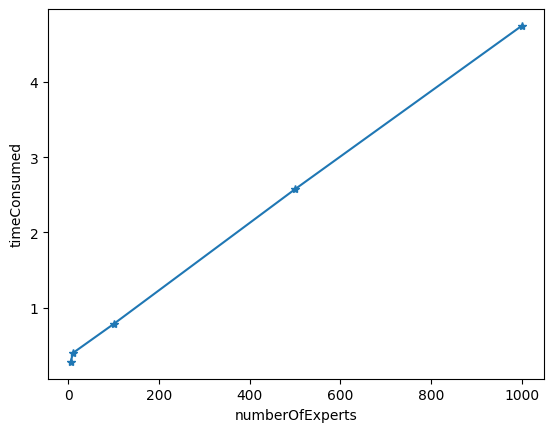

highest marks gaining candidate = 1883


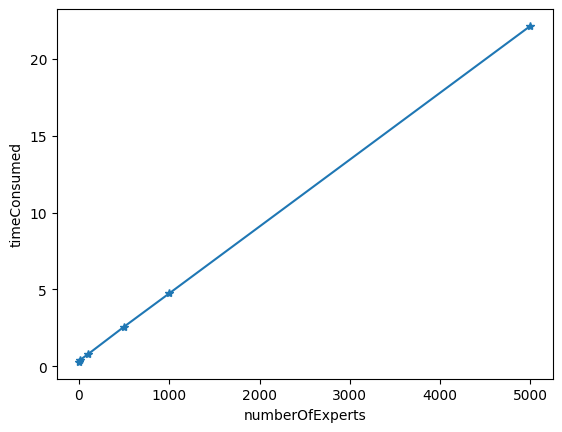

highest marks gaining candidate = 1864


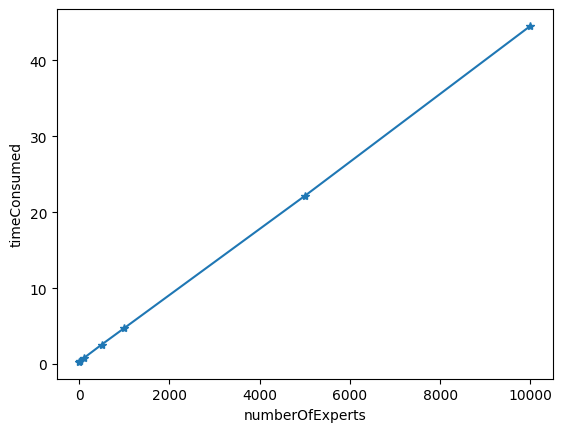

In [18]:
experts = 10
timeList = []
candidates = [5,10,100,500,1000,5000,10000]
for i in range(len(candidates)):
    start = timer()
    initVariables(experts, candidates[i])
    generateRSAKeys()
    expertFunctionToGiveMarks()
    candidateManagerFrameWork1BestCandidate()
    end = timer()
    timeList.append(end - start)
    plotGraph(candidates[0:i+1],timeList)
# print(marksToCandidates)